# Code by Sanket More

# Load required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import datetime
import seaborn as sns
from sklearn.cluster import KMeans  
from scipy import stats
import numpy as np
import plotly.express as px
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

In [2]:
#load csv to dataframe
df1=pd.read_csv("Marketing.csv")

In [3]:
#checking columns 
df1.head()
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df1.shape

(2240, 29)

# Checking distribution of Income column to impute null values

<AxesSubplot:>

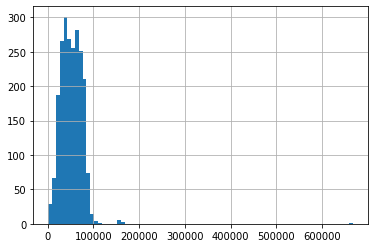

In [8]:
df1["Income"].hist(bins=80)

## Distribution occurs to be normal, hence using Mean to impute null values

In [4]:
df1["Income"]=df1["Income"].fillna(df1["Income"].mean())

In [89]:
df1.shape

(2240, 29)

# Calculating Z Scores of quantitative columns in the data

In [5]:
z_scores = stats.zscore(df1[['Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])



# Eliminating the outliers by filtering dataset for Z scores less than +- 3 Sigma

In [6]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df1[filtered_entries]

#print(new_df)

In [7]:
new_df.shape

(1980, 29)

In [8]:
df1 = new_df

In [9]:
df1.columns
#df1.info()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
df1.shape

(1980, 29)

In [10]:
df1["Teenhome"].unique()

array([0, 1, 2], dtype=int64)

# Adding Kids and Teen numbers to get the total Children at home

In [11]:
df1["children_home"]=df1["Kidhome"]+df1["Teenhome"]
df1.head(2)
#df1["Education"].value_counts()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   

   Z_Revenue  Response  children_home  
0         11         1              0  
1         11         0              2  

[2 rows x 30 columns]

In [19]:
df1["Marital_Status"].value_counts()

Married     766
Together    520
Single      417
Divorced    208
Widow        63
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

# Setting the Marital Status as 2 if Married and 1 otherwise

In [12]:
df1["Marital_Status"].replace({"Married","Together"},2,inplace=True)
df1["Marital_Status"].replace({"Single","Divorced","Widow","Alone","Absurd","YOLO"},1,inplace=True)

In [21]:
df1.head(9)

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               1  58138.0        0         0   
1  2174        1954  Graduation               1  46344.0        1         1   
2  4141        1965  Graduation               2  71613.0        0         0   
3  6182        1984  Graduation               2  26646.0        1         0   
4  5324        1981         PhD               2  58293.0        1         0   
5  7446        1967      Master               2  62513.0        0         1   
6   965        1971  Graduation               1  55635.0        0         1   
7  6177        1985         PhD               2  33454.0        1         0   
8  4855        1974         PhD               2  30351.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   
5  09-09-2013       16       520  ...             0             0   
6  13-11-2012       34       235  ...             0             0   
7  08-05-2013       32        76  ...             0             0   
8  06-06-2013       19        14  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   
5             0             0             0         0              3   
6             0             0             0         0              3   
7             0             0             0         0              3   
8             0             0             0         0              3   

   Z_Revenue  Response  children_home  
0         11         1              0  
1         11         0              2  
2         11         0              0  
3         11         0              1  
4         11         0              1  
5         11         0              1  
6         11         0              1  
7         11         0              1  
8         11         1              1  

[9 rows x 30 columns]

# Calculating total Family members by adding Marital Status Code and Children at home

In [13]:
df1["total_family_members"]=df1["Marital_Status"]+df1["children_home"]

In [23]:
df1.head(2)
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'children_home', 'total_family_members'],
      dtype='object')

# Drop ID, Kidhome and Teenhome ,Z_cost,Z_Revenue since these are not required now

In [14]:
df2=df1.drop(["ID","Kidhome","Teenhome","Z_CostContact","Z_Revenue"],axis=1)

In [15]:
df2=df2.drop(["children_home"],axis=1)
#df2=df2.drop(["total_spent"],axis=1)

# Calculating Age from the Year birth column

In [16]:
df2["Age"]=2022-df2["Year_Birth"]
df2=df2.drop(["Year_Birth"],axis=1)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             1980 non-null   object 
 1   Marital_Status        1980 non-null   int64  
 2   Income                1980 non-null   float64
 3   Dt_Customer           1980 non-null   object 
 4   Recency               1980 non-null   int64  
 5   MntWines              1980 non-null   int64  
 6   MntFruits             1980 non-null   int64  
 7   MntMeatProducts       1980 non-null   int64  
 8   MntFishProducts       1980 non-null   int64  
 9   MntSweetProducts      1980 non-null   int64  
 10  MntGoldProds          1980 non-null   int64  
 11  NumDealsPurchases     1980 non-null   int64  
 12  NumWebPurchases       1980 non-null   int64  
 13  NumCatalogPurchases   1980 non-null   int64  
 14  NumStorePurchases     1980 non-null   int64  
 15  NumWebVisitsMonth    

# Converting the Dt_Customer to proper datetime format

In [18]:
df2['New_date'] =  pd.to_datetime(df2['Dt_Customer'])

In [19]:
today = datetime.datetime.now()
today

datetime.datetime(2022, 4, 19, 23, 7, 19, 786706)

# Calculating Enrolment duration from the customer joining date

In [20]:
df2["Enrolment_duration"]=datetime.datetime.today()-df2["New_date"]
df2["Enrolment_duration"]=df2["Enrolment_duration"].dt.days
df2=df2.drop(columns="New_date")

In [21]:
df2= df2.rename(columns={'Enrolment_duration': 'Enrolment_days'})

In [22]:
df2=df2.drop(["Marital_Status","Dt_Customer"],axis=1)
df2.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_family_members', 'Age',
       'Enrolment_days'],
      dtype='object')

# Creating a Total Spend column that adds the spends from the available columns like Wines, Fruits, Meat, Fish, Sweets and Gold

In [23]:
df2['Total Spent'] = df2['MntWines'] + df2['MntFruits']+ df2['MntMeatProducts']+ df2['MntFishProducts']+ df2['MntSweetProducts'] + df2['MntGoldProds']

# Creating Total Purchases column from the availble columns for modes of purchases - Deals, Web, Catalog, Store

In [24]:
df2['Total Purchases'] = df2['NumDealsPurchases'] + df2['NumWebPurchases']+ df2['NumCatalogPurchases']+ df2['NumStorePurchases']

# One Hot encode the Education column

In [25]:
df2=pd.get_dummies(df2, columns=['Education'], prefix="Ed", prefix_sep="-")

In [26]:
df2.head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                88            88                  3                8  ...   
1                 1             6                  2                1  ...   
2                21            42                  1                8  ...   
3                 3             5                  2                2  ...   
4                27            15                  5                5  ...   

   total_family_members  Age  Enrolment_days  Total Spent  Total Purchases  \
0                     1   65            3662         1617               25   
1                     3   68            2816           27                6   
2                     2   57            3163          776               21   
3                     3   38            2756           53                8   
4                     3   41            3012          422               19   

   Ed-2n Cycle  Ed-Basic  Ed-Graduation  Ed-Master  Ed-PhD  
0            0         0              1          0       0  
1            0         0              1          0       0  
2            0         0              1          0       0  
3            0         0              1          0       0  
4            0         0              0          0       1  

[5 rows x 30 columns]

# Storing the processed data to csv

In [27]:
df2.to_csv("code_hunters.csv")

# Standard Scaling the data for Clustering since unscaled data will skew the weightage towards column with larger magnitude

In [28]:
scaler = StandardScaler()
df2_sc = scaler.fit_transform(df2)
df2_sc = pd.DataFrame(df2_sc, columns=df2.columns)

In [29]:
df2_sc.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'total_family_members', 'Age', 'Enrolment_days',
       'Total Spent', 'Total Purchases', 'Ed-2n Cycle', 'Ed-Basic',
       'Ed-Graduation', 'Ed-Master', 'Ed-PhD'],
      dtype='object')

# Removing the binary variables as these are not recommended to be used with distance algorithm used with K means clustering

In [30]:
dfn= df2_sc.drop(['Ed-2n Cycle', 'Ed-Basic',
       'Ed-Graduation', 'Ed-Master', 'Ed-PhD', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'], axis =1 )

In [122]:
dfn.shape

(1980, 20)

# Calculating the optimal K value by Elbow Method 

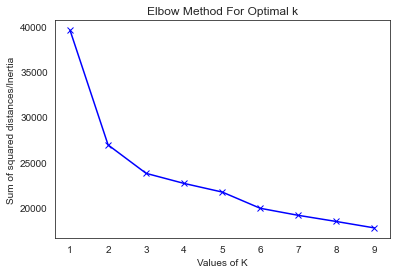

In [110]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(dfn)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [123]:
df_new=pd.read_csv("code_hunters_n.csv")

# Calculating optimum clusters with Silhouette method

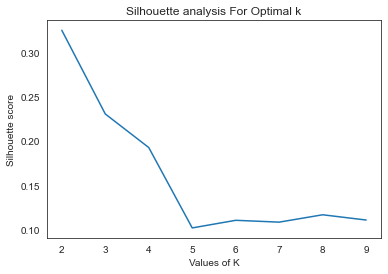

In [111]:
A=[]
K_values=range(2,10)
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dfn)
    cluster_labels = kmeans.labels_
    B=silhouette_score(dfn, cluster_labels)
    A.append(B)
plt.plot(K_values,A)  
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

# Optimal k value seems to be 3 with Elbow method and 2 via Silhouette analysis

# Trying clusters with N = 2

<AxesSubplot:>

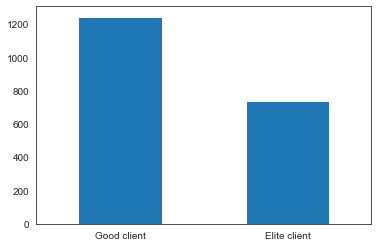

In [181]:

kmeans = KMeans(n_clusters = 2, max_iter = 3000, random_state = 228).fit(dfn)
#labels = gmm.predict(data_clustring)
labels = kmeans.predict(dfn)

df_cluster = pd.DataFrame()
df_cluster['Cluster'] = labels
data_re_clust = {
    0: 'Good client',
    1: 'Elite client',
#    2: 'Ordinary client'
}
df_cluster['Cluster'] = df_cluster['Cluster'].map(data_re_clust)

dftemp = df_cluster['Cluster'].value_counts()
dftemp.plot.bar(x='lab', y='val', rot=0)

# Trying Clustering with N = 3

<AxesSubplot:>

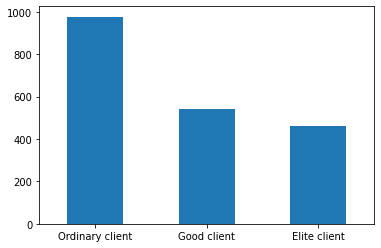

In [31]:

kmeans = KMeans(n_clusters = 3, max_iter = 3000, random_state = 228).fit(dfn)
#labels = gmm.predict(data_clustring)
labels = kmeans.predict(dfn)

df_cluster = pd.DataFrame()
df_cluster['Cluster'] = labels
data_re_clust = {
    0: 'Good client',
    1: 'Elite client',
    2: 'Ordinary client'
}
df_cluster['Cluster'] = df_cluster['Cluster'].map(data_re_clust)

dftemp = df_cluster['Cluster'].value_counts()
dftemp.plot.bar(x='lab', y='val', rot=0)

# We see around 700 Elite customers with N = 2 and around 500 Elite customers with N =3
## We would have greater flexibility with N = 3 since we can decide whether to go ahead and target the middle cluster or not. Therefore, we would go ahead with 3 clusters from here considering practical aspects

In [113]:
#df2_sc

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0     0.454812  0.299646  1.136401   2.302100         2.289735   
1    -0.150212 -0.390157 -0.817256  -0.632749        -0.696956   
2     1.146071 -0.804038  0.482051   0.986478        -0.027716   
3    -1.160707 -0.804038 -0.817256  -0.531547        -0.619523   
4     0.462764  1.541291 -0.310056   0.784074        -0.077494   
...        ...       ...       ...        ...              ...   
1975 -0.761855  1.092919 -0.842303  -0.565281        -0.691425   
1976  0.756247  0.230666  0.419434  -0.666483        -0.564214   
1977  0.395459  1.437821  1.991126   0.952744         0.470066   
1978  1.024594 -1.424861  0.488313   0.345534         0.453473   
1979  0.184516 -0.321176 -0.588703  -0.565281        -0.392756   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            3.417273          2.203763      1.174892           0.447749   
1           -0.634944         -0.632250     -0.725290          -0.184142   
2            1.963242          0.019707      0.108936          -0.816033   
3           -0.444251         -0.567054     -0.748463          -0.184142   
4            0.413865          0.215294     -0.516733           1.711530   
...               ...               ...           ...                ...   
1975        -0.539597         -0.599652     -0.655771          -0.816033   
1976        -0.682617         -0.664848     -0.678944           2.975311   
1977         0.080153         -0.273674     -0.308177          -0.816033   
1978         1.224309          0.313088      0.549222          -0.184142   
1979        -0.634944         -0.632250     -0.377696           0.447749   

      NumWebPurchases  ...       Age  Enrolment_days  Total Spent  \
0            1.571386  ...  1.004624        2.019192     2.052559   
1           -1.113452  ...  1.258278       -1.650015    -0.895913   
2            1.571386  ...  0.328213       -0.145033     0.493021   
3           -0.729904  ... -1.278263       -1.910243    -0.847699   
4            0.420741  ... -1.024609       -0.799939    -0.163431   
...               ...  ...       ...             ...          ...   
1975        -1.113452  ... -0.432749        0.835157    -0.890350   
1976         1.571386  ...  1.934689       -1.927591    -0.122635   
1977        -0.729904  ... -1.024609       -0.825961     1.355310   
1978         0.804289  ...  1.089175       -0.821624     0.617265   
1979        -0.346356  ...  1.258278        1.199475    -0.627027   

      Total Purchases  Ed-2n Cycle  Ed-Basic  Ed-Graduation  Ed-Master  \
0            1.468589    -0.311373 -0.165843       1.019380  -0.452894   
1           -1.084240    -0.311373 -0.165843       1.019380  -0.452894   
2            0.931151    -0.311373 -0.165843       1.019380  -0.452894   
3           -0.815521    -0.311373 -0.165843       1.019380  -0.452894   
4            0.662433    -0.311373 -0.165843      -0.980989  -0.452894   
...               ...          ...       ...            ...        ...   
1975        -1.352959    -0.311373 -0.165843       1.019380  -0.452894   
1976         1.065511    -0.311373 -0.165843      -0.980989  -0.452894   
1977         0.662433    -0.311373 -0.165843       1.019380  -0.452894   
1978         1.199870    -0.311373 -0.165843      -0.980989   2.208024   
1979        -0.412443    -0.311373 -0.165843      -0.980989  -0.452894   

        Ed-PhD       Cluster  
0    -0.537645  Elite client  
1    -0.537645   Good client  
2    -0.537645  Elite client  
3    -0.537645   Good client  
4     1.859962   Good client  
...        ...           ...  
1975 -0.537645   Good client  
1976  1.859962   Good client  
1977 -0.537645  Elite client  
1978 -0.537645  Elite client  
1979  1.859962   Good client  

[1980 rows x 31 columns]

In [97]:
#dfn_wo_cluster = dfn.drop('Cluster', axis =1)

# Clubbing the cluster column with the original dataset

In [32]:
df3= scaler.inverse_transform(df2_sc)
df3 = pd.DataFrame(df3, columns = df2_sc.columns)
df4 = pd.concat([df3,df_cluster['Cluster']], axis=1)
df4

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0     58.0     635.0       88.0            546.0     1.720000e+02   
1     46344.0     38.0      11.0        1.0              6.0     2.000000e+00   
2     71613.0     26.0     426.0       49.0            127.0     1.110000e+02   
3     26646.0     26.0      11.0        4.0             20.0     1.000000e+01   
4     58293.0     94.0     173.0       43.0            118.0     4.600000e+01   
...       ...      ...       ...        ...              ...              ...   
1975  34421.0     81.0       3.0        3.0              7.0     6.000000e+00   
1976  64014.0     56.0     406.0        0.0             30.0     3.552714e-15   
1977  56981.0     91.0     908.0       48.0            217.0     3.200000e+01   
1978  69245.0      8.0     428.0       30.0            214.0     8.000000e+01   
1979  52869.0     40.0      84.0        3.0             61.0     2.000000e+00   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                 88.0          88.0                3.0              8.0  ...   
1                  1.0           6.0                2.0              1.0  ...   
2                 21.0          42.0                1.0              8.0  ...   
3                  3.0           5.0                2.0              2.0  ...   
4                 27.0          15.0                5.0              5.0  ...   
...                ...           ...                ...              ...  ...   
1975               2.0           9.0                1.0              1.0  ...   
1976               0.0           8.0                7.0              8.0  ...   
1977              12.0          24.0                1.0              2.0  ...   
1978              30.0          61.0                2.0              6.0  ...   
1979               1.0          21.0                3.0              3.0  ...   

       Age  Enrolment_days  Total Spent  Total Purchases  Ed-2n Cycle  \
0     65.0          3662.0       1617.0             25.0          0.0   
1     68.0          2816.0         27.0              6.0          0.0   
2     57.0          3163.0        776.0             21.0          0.0   
3     38.0          2756.0         53.0              8.0          0.0   
4     41.0          3012.0        422.0             19.0          0.0   
...    ...             ...          ...              ...          ...   
1975  48.0          3389.0         30.0              4.0          0.0   
1976  76.0          2752.0        444.0             22.0          0.0   
1977  41.0          3006.0       1241.0             19.0          0.0   
1978  66.0          3007.0        843.0             23.0          0.0   
1979  68.0          3473.0        172.0             11.0          0.0   

      Ed-Basic  Ed-Graduation  Ed-Master        Ed-PhD          Cluster  
0          0.0            1.0        0.0 -2.775558e-17     Elite client  
1          0.0            1.0        0.0 -2.775558e-17  Ordinary client  
2          0.0            1.0        0.0 -2.775558e-17     Elite client  
3          0.0            1.0        0.0 -2.775558e-17  Ordinary client  
4          0.0            0.0        0.0  1.000000e+00      Good client  
...        ...            ...        ...           ...              ...  
1975       0.0            1.0        0.0 -2.775558e-17  Ordinary client  
1976       0.0            0.0        0.0  1.000000e+00      Good client  
1977       0.0            1.0        0.0 -2.775558e-17     Elite client  
1978       0.0            0.0        1.0 -2.775558e-17     Elite client  
1979       0.0            0.0        0.0  1.000000e+00  Ordinary client  

[1980 rows x 31 columns]

In [33]:
df4.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'total_family_members', 'Age', 'Enrolment_days',
       'Total Spent', 'Total Purchases', 'Ed-2n Cycle', 'Ed-Basic',
       'Ed-Graduation', 'Ed-Master', 'Ed-PhD', 'Cluster'],
      dtype='object')

Text(0.5, 1.0, 'For Campaing 1')

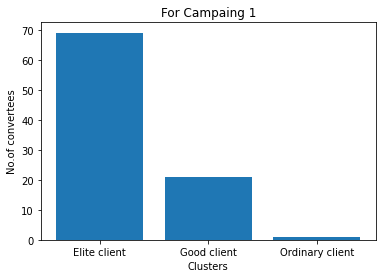

In [34]:
df5=df4[df4["AcceptedCmp1"]==1]
x=df5["Cluster"].unique()
y=df5["Cluster"].value_counts()
plt.bar(x,y)
plt.xlabel("Clusters")
plt.ylabel("No.of convertees")
plt.title("For Campaing 1")

# For Campaign 1 we see most of the participants from Elite class

Text(0.5, 1.0, 'For Campaing 2')

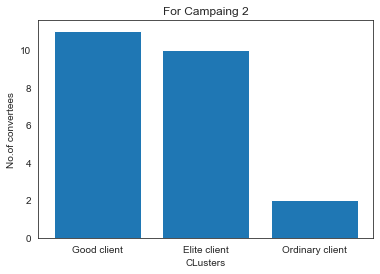

In [186]:
df6=df4[df4["AcceptedCmp2"]==1]
x=df6["Cluster"].unique()
y=df6["Cluster"].value_counts()
plt.bar(x,y)
plt.xlabel("CLusters")
plt.ylabel("No.of convertees")
plt.title("For Campaing 2")

# For Campaign 2, we see a mix of both Elite and Good customers 

Text(0.5, 1.0, 'For Campaing 3')

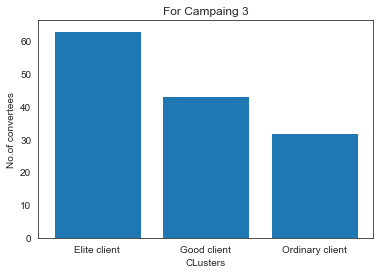

In [187]:
df7=df4[df4["AcceptedCmp3"]==1]
x=df7["Cluster"].unique()
y=df7["Cluster"].value_counts()
plt.bar(x,y)

plt.xlabel("CLusters")
plt.ylabel("No.of convertees")
plt.title("For Campaing 3")


Text(0.5, 1.0, 'For Campaing 4')

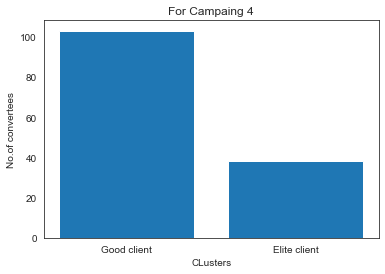

In [128]:
df8=df4[df4["AcceptedCmp4"]==1]
x=df8["Cluster"].unique()
y=df8["Cluster"].value_counts()
plt.bar(x,y)

plt.xlabel("CLusters")
plt.ylabel("No.of convertees")
plt.title("For Campaing 4")

# For Campaign 4, we see more of Good customers

Text(0.5, 1.0, 'For Campaing 5')

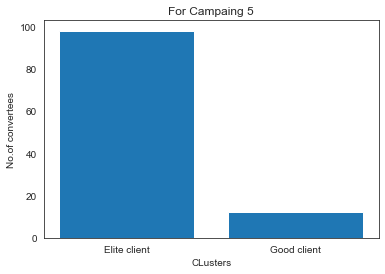

In [188]:
df9=df4[df4["AcceptedCmp5"]==1]
x=df9["Cluster"].unique()
y=df9["Cluster"].value_counts()
plt.bar(x,y)

plt.xlabel("CLusters")
plt.ylabel("No.of convertees")
plt.title("For Campaing 5")

# For Campaign 5, we see a lot of Elite customers

Text(0.5, 1.0, 'For Campaing 6')

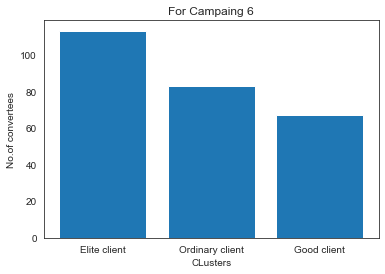

In [189]:
df10=df4[df4["Response"]==1]
x=df10["Cluster"].unique()
y=df10["Cluster"].value_counts()
plt.bar(x,y)

plt.xlabel("CLusters")
plt.ylabel("No.of convertees")
plt.title("For Campaing 6")

# For Campaign 6, we see a mix of all 3

In [131]:
#df2_sc.groupby('Cluster')['Income'].mean()

In [35]:
idx_dic = {}

for col in df4.columns:
    idx_dic[col] = df4.columns.get_loc(col)
print(idx_dic)

{'Income': 0, 'Recency': 1, 'MntWines': 2, 'MntFruits': 3, 'MntMeatProducts': 4, 'MntFishProducts': 5, 'MntSweetProducts': 6, 'MntGoldProds': 7, 'NumDealsPurchases': 8, 'NumWebPurchases': 9, 'NumCatalogPurchases': 10, 'NumStorePurchases': 11, 'NumWebVisitsMonth': 12, 'AcceptedCmp3': 13, 'AcceptedCmp4': 14, 'AcceptedCmp5': 15, 'AcceptedCmp1': 16, 'AcceptedCmp2': 17, 'Complain': 18, 'Response': 19, 'total_family_members': 20, 'Age': 21, 'Enrolment_days': 22, 'Total Spent': 23, 'Total Purchases': 24, 'Ed-2n Cycle': 25, 'Ed-Basic': 26, 'Ed-Graduation': 27, 'Ed-Master': 28, 'Ed-PhD': 29, 'Cluster': 30}


# Visualizing the cluster for 2 columns- Income and Age

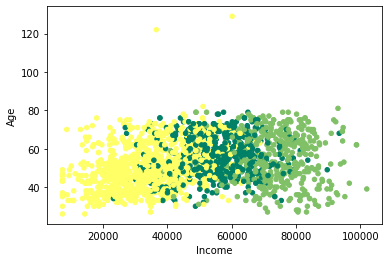

In [36]:
x_col_index = 0
y_col_index = 21
plt.scatter(df4.iloc[:, x_col_index], df4.iloc[:,y_col_index], c=labels, s=20, cmap='summer')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.xlabel(df4.columns[x_col_index])
plt.ylabel(df4.columns[y_col_index])
plt.show()

# Checking the split of customers for the Clustering

In [37]:

fig = px.pie(df4['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 500, height = 500)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.6, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Customers: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of Customers <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 16, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

# Trying 3 d plot of Income, Spends and Wine consumption

In [38]:
plot = go.Figure()

colors = ['#b4b4b4', '#dd4124', '#009473']
names = ['Ordinary client', 'Elite client', 'Good client']

for i in range(3):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = df4.query("Cluster == @cl")['Income'],
                                y = df4.query("Cluster == @cl")['Total Spent'],
                                z = df4.query("Cluster == @cl")['MntWines'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Income: %{x} <br>Recency: %{y} <br>Fam members: %{z}')

plot.update_layout(width = 1000, height = 1000, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Income', titlefont_color = 'black'),
                                yaxis = dict(title = 'Total Spent', titlefont_color = 'black'),
                                zaxis = dict(title = 'MntWines', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 12),
                   title_text = 'Customers clusters', title_x = 0.5)

# Insight: Elite group have high Income, Have high Expenditures as well as drink more wine

In [194]:
kmeans.cluster_centers_.shape

(3, 20)

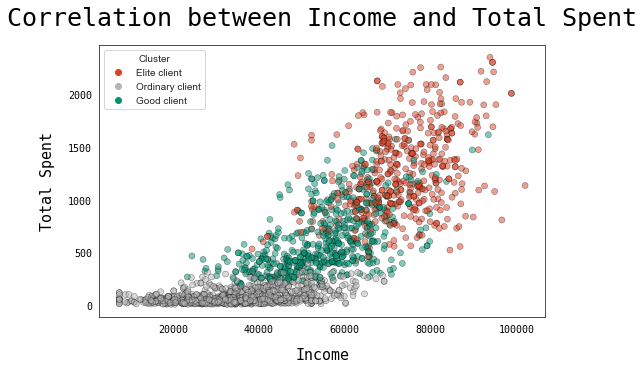

In [157]:
x = 'Income'
y = 'Total Spent'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (1, 8), linewidth = 0.5, edgecolor = "black", alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Elite and Good Customers have high Income as well as spend high

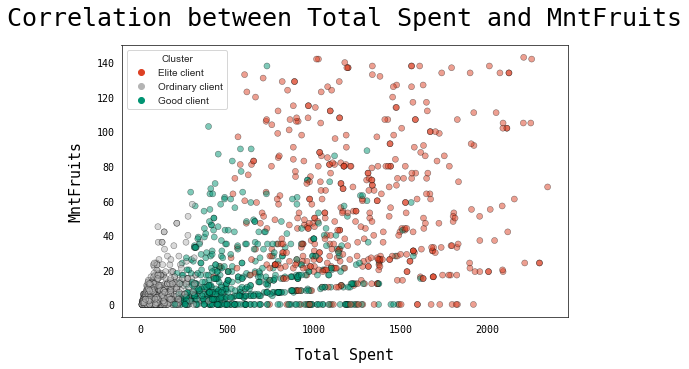

In [158]:
x = 'Total Spent'
y = 'MntFruits'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (1, 8), linewidth = 0.5, edgecolor = "black", alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Elite group also eat more fruit

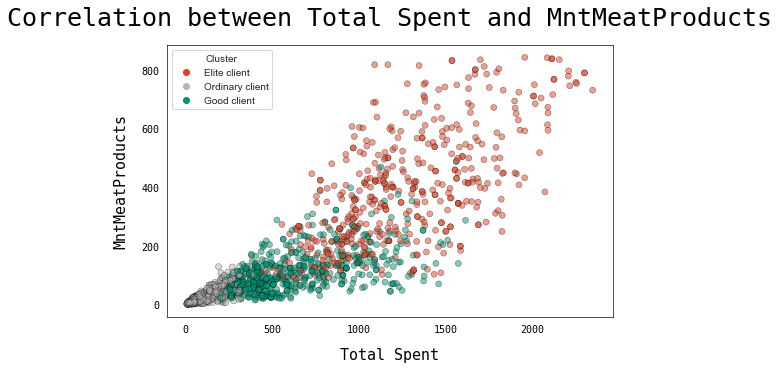

In [195]:
x = 'Total Spent'
y = 'MntMeatProducts'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (1, 8), linewidth = 0.5, edgecolor = "black", alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Elite customers also love meat

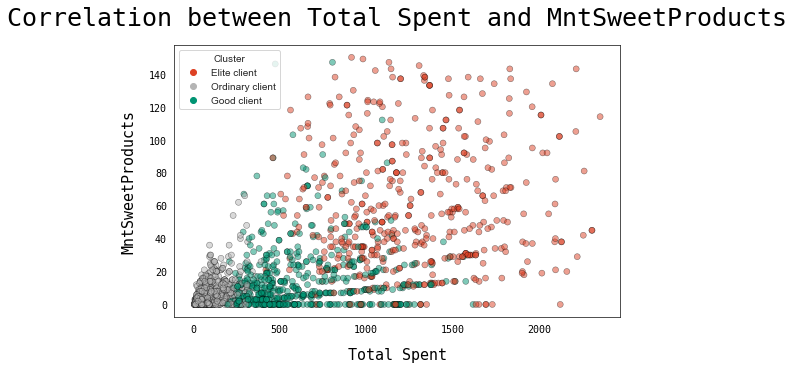

In [196]:
x = 'Total Spent'
y = 'MntSweetProducts'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (1, 8), linewidth = 0.5, edgecolor = "black", alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Similar trend is seen for sweet products

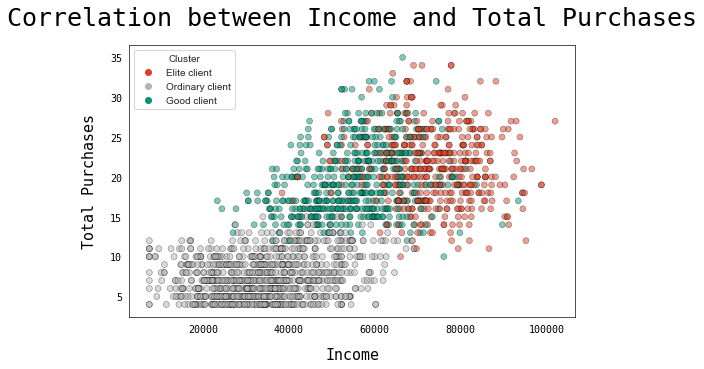

In [197]:
x = 'Income'
y = 'Total Purchases'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (1, 8), linewidth = 0.5, edgecolor = "black", alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Elite and Good Customers even have High total Purchases ( Inclusive of all modes of purchases)

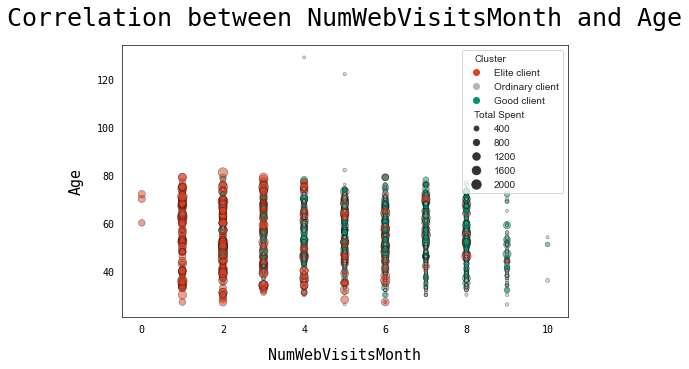

In [198]:
x = 'NumWebVisitsMonth'
y = 'Age'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (8, 100), linewidth = 0.5, edgecolor = "black", size = df4['Total Spent'], alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Most of our elite clients are not visiting the Web

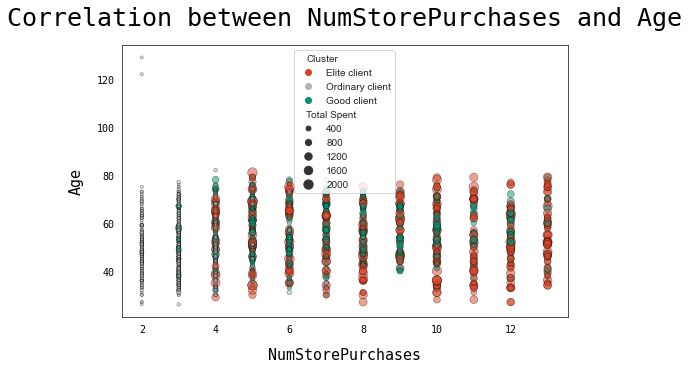

In [199]:
x = 'NumStorePurchases'
y = 'Age'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (8, 100), linewidth = 0.5, edgecolor = "black", size = df4['Total Spent'], alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# They are slightly more inclined to go to Stores for purchases

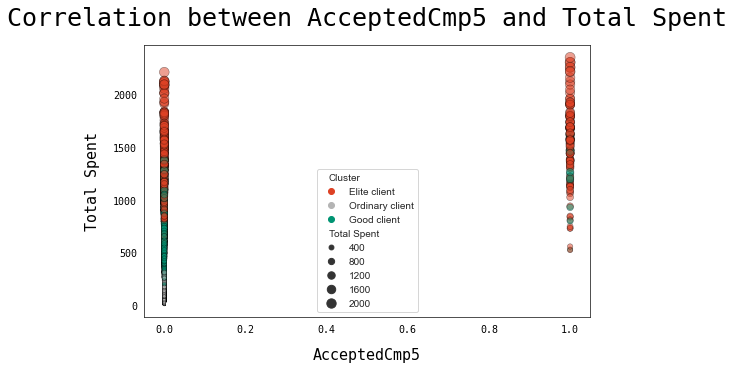

In [200]:

x = 'AcceptedCmp5'
y = 'Total Spent'
plt.figure(figsize = (8, 5))
sns.set_style("white")
plt.title("Correlation between " + x + " and " + y , size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df4, x = x, y = y, hue = "Cluster", palette = ['#dd4124', '#b4b4b4'
                                                                          , '#009473'
                                                                         ], sizes = (8, 100), linewidth = 0.5, edgecolor = "black", size = df4['Total Spent'], alpha = 0.5)
plt.xticks(fontname = 'monospace', size = 10, color = 'black')
plt.yticks(fontname = 'monospace', size = 10, color = 'black')
plt.xlabel(x, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel(y, labelpad = 13, fontname = 'monospace', fontsize = 15, color = 'black')
   
plt.show()

# Out of those who accepted the Campaign 5, most belong to our clustered elite category

# ==============================================================
# Summarizing the insights --------------------------------------

#### 1. Elite group consists of 460 customers
#### 2. They form 23% of the population
#### 3. Elite cluster spends more, has high income 
#### 4. Elite cluster likes Wine, Fruits and other eatables
#### 5. Elite customers purchase more considering all the food, beverage categories

# Response to physical Stores --------------------------------------
#### Elite customers are more inclined to go to physical stores than web visits

# Campaign Response --------------------------------------------
#### 1. Campaigns 1,3,5 and 6 were the ones where maximum participation was from the Elite class
#### 2. Campaigns 2,4 were the ones where maximum participation was from the Good cluster

# Marketing objectives --------------------------------------------

#### We need to target the Elite class of customers considering all these attributes. Since this is a small group, we can concentrate our efforts more and have effective offers, discounts to maximize Revenues and overall Profit
#### We can also target the Good cluster to promote them to the Elite class
#### For targeting the Elite class, we can focus on campaigns 1,3,5,6 and check what made these campaigns attract the Elite class